In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle
import matplotlib.pyplot as plt

In [3]:
import os

GOOGLE_DRIVE_PATH_POST_MYDRIVE = "Colab_Notebooks/DL_group_proj"
GOOGLE_DRIVE_PATH = os.path.join('/content', 'drive', 'MyDrive', GOOGLE_DRIVE_PATH_POST_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['data', '__pycache__', 'requirements.txt', 'readme.docx', 'legnet.pkl', 'legnet_metrics_100_40_512.pkl', '.ipynb_checkpoints', 'legnet_history_100_20_512.pkl', 'dilation_100_20_512.pkl', 'dilation_100_20_512.pt', 'dilation_100_20_512_222222.pkl', 'dilation_100_20_512_222222.pt', 'dilation_100_20_512_222444.pt', 'dilation_100_20_512_222444.pkl', 'rolg', 'helper_fuctions.py', 'legnet_dialation.py', 'legnet.py', 'legnet_dilation_100_20_512.pt', 'legnet_metrics_100_20_512.pkl', 'legnet_100_20_512.pt', 'legnet_dilation_100_20_512_4322111_02.pkl', 'legnet_dilation_100_20_512_4322111_02.pt', 'legnet_dilation_100_20_512_4322111_03.pkl', 'legnet_dilation_100_20_512_4322111_03.pt', 'legnet_dilation_100_20_512_4322111_04.pkl', 'legnet_dilation_100_20_512_4322111_04.pt', 'legnet_dilation_100_20_512_4322111_01.pt', 'legnet_dilation_100_20_512_4322111_01.pkl', 'legnet_dilation_100_10_512_4322111_01.pkl', 'legnet_dilation_100_10_512_4322111_01.pt', 'legnet_dilation_100_10_512_4322111_04.pkl', 'legne

In [4]:
import sys
sys.path.append(GOOGLE_DRIVE_PATH)

In [9]:
with open(GOOGLE_DRIVE_PATH + '/legnet_100_10_512.pkl', 'rb') as f:
    legnet_5120 = pickle.load(f)

with open(GOOGLE_DRIVE_PATH + '/legnet_metrics_100_20_512.pkl', 'rb') as f:
    legnet_10240 = pickle.load(f)

with open(GOOGLE_DRIVE_PATH + '/legnet_100_40_512.pkl', 'rb') as f:
    legnet_20480 = pickle.load(f)

In [12]:
legnet_train_loss_5120, legnet_train_pearson_5120 = [], []
legnet_train_loss_10240, legnet_train_pearson_10240 = [], []
legnet_train_loss_20480, legnet_train_pearson_20480 = [], []

epoch = len(legnet_5120["val_loss"])

batch_size = len(legnet_5120["train_loss"]) // len(legnet_5120["val_loss"])
for i in range(0, len(legnet_5120["train_loss"]), batch_size):
  legnet_train_loss_5120.append(sum(legnet_5120["train_loss"][i:i+batch_size]) / batch_size)
  legnet_train_pearson_5120.append(sum(legnet_5120["train_pearson"][i:i+batch_size]) / batch_size)

batch_size = len(legnet_10240["train_loss"]) // len(legnet_10240["val_loss"])
for i in range(0, len(legnet_10240["train_loss"]), batch_size):
  legnet_train_loss_10240.append(sum(legnet_10240["train_loss"][i:i+batch_size]) / batch_size)
  legnet_train_pearson_10240.append(sum(legnet_10240["train_pearson"][i:i+batch_size]) / batch_size)

batch_size = len(legnet_20480["train_loss"]) // len(legnet_20480["val_loss"])
for i in range(0, len(legnet_20480["train_loss"]), batch_size):
  legnet_train_loss_20480.append(sum(legnet_20480["train_loss"][i:i+batch_size]) / batch_size)
  legnet_train_pearson_20480.append(sum(legnet_20480["train_pearson"][i:i+batch_size]) / batch_size)

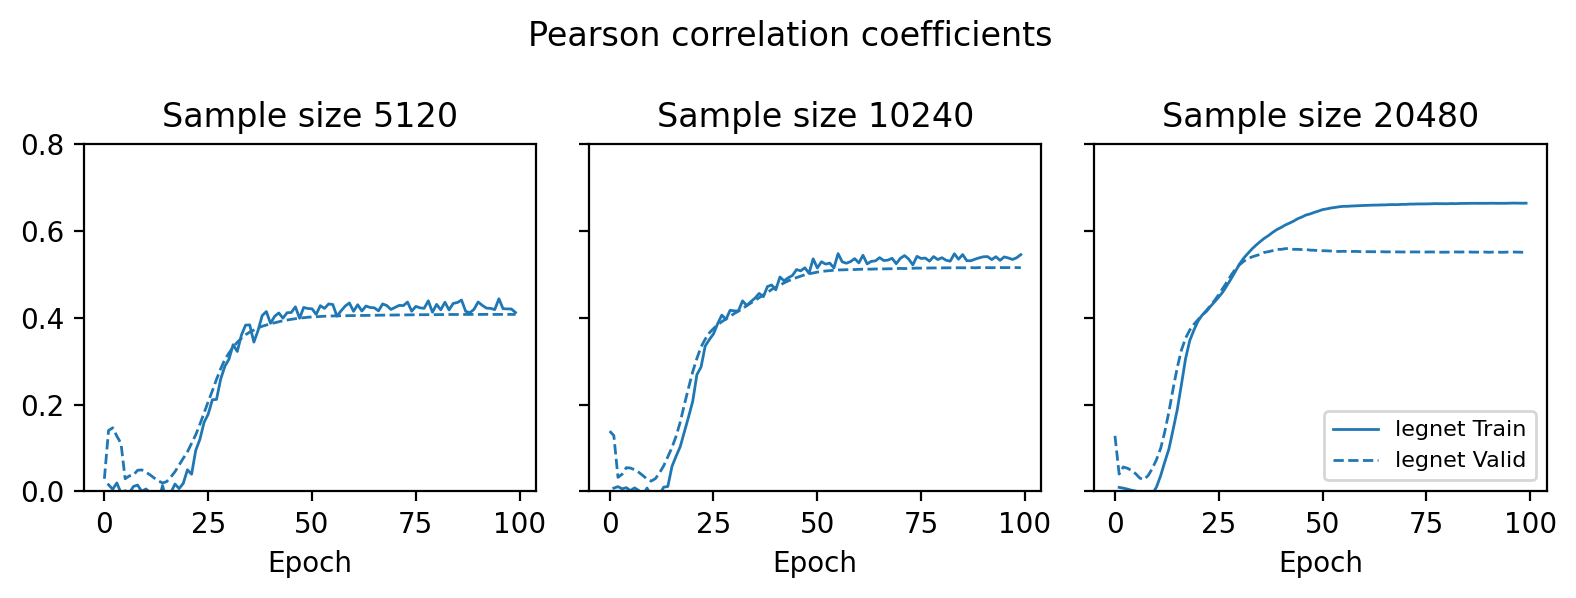

In [13]:
fig, ax = plt.subplots(figsize=(8, 3), ncols=3, dpi=200, sharey=True)

ax[0].plot([e for e in range(epoch)], legnet_train_pearson_5120, linewidth=1, c="C0",label="legnet Train")
ax[0].plot([e for e in range(epoch)], legnet_5120["val_pearson"], linewidth=1, c="C0", linestyle="--",label="legnet Valid")


ax[0].set_ylim(bottom=0, top=0.8)
ax[0].set_title("Sample size 5120")
ax[0].set_xlabel("Epoch")


ax[1].plot([e for e in range(epoch)], legnet_train_pearson_10240, linewidth=1, c="C0",label="legnet Train")
ax[1].plot([e for e in range(epoch)], legnet_10240["val_pearson"], linewidth=1, c="C0", linestyle="--",label="legnet Validation")

ax[1].set_title("Sample size 10240")
ax[1].set_xlabel("Epoch")
# ax[1].legend(fontsize=8)

ax[2].plot([e for e in range(epoch)], legnet_train_pearson_20480, linewidth=1, c="C0",label="legnet Train")
ax[2].plot([e for e in range(epoch)], legnet_20480["val_pearson"], linewidth=1, c="C0", linestyle="--",label="legnet Valid")

ax[2].set_title("Sample size 20480")
ax[2].set_xlabel("Epoch")
ax[2].legend(fontsize=8)

plt.suptitle("Pearson correlation coefficients")
plt.tight_layout()
